# IMAGE SEGMENTATION

In [36]:
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# load the image and convert it to grayscale
image = cv2.imread("/Users/rahulr/Downloads/us_images/09-49-17_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = 60

In [38]:
# initialize the list of threshold methods
methods = [
	("THRESH_BINARY", cv2.THRESH_BINARY),
	("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
	("THRESH_TRUNC", cv2.THRESH_TRUNC),
	("THRESH_TOZERO", cv2.THRESH_TOZERO),
	("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV)]

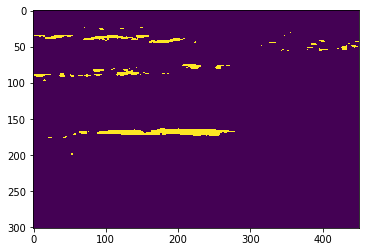

In [ ]:
# loop over the threshold methods
for (threshName, threshMethod) in methods:
    # threshold the image and show it
    (T, thresh) = cv2.threshold(gray, threshold, 255, threshMethod)
    imgplot = plt.imshow(thresh)
    plt.show()
    # 	cv2.imshow(threshName, thresh)
    cv2.imwrite("Output-" + threshName + ".jpg", thresh)
    cv2.waitKey(0)

In [ ]:
cv2.imshow("Gray Image", gray)
# plt.imshow(gray)
# plt.show()

In [ ]:
# Applying Gaussian blur with kernel size 7 to remove unwanted noise
# blurred_image = cv2.GaussianBlur(gray,(7,7),0)

In [ ]:
# plt.imshow(blurred_image)
# plt.show()

In [ ]:
# Applying Otsu's thresholding to binarize the image
retval ,binarized_image = cv2.threshold(gray,40,80,cv2.THRESH_BINARY)

In [ ]:
plt.imshow(binarized_image)
plt.show()
plt.imshow(image)
plt.show()

In [ ]:
# Applying Closing to fill in the holes
filter = np.ones((3,3),np.uint8)
closed_image = cv2.morphologyEx(binarized_image, cv2.MORPH_CLOSE, filter)

In [ ]:
plt.imshow(closed_image)
plt.show()

In [ ]:
# Using connected components to label the image
retval, markers = cv2.connectedComponents(closed_image)

# Mapping the component labels to hue val
label_hue = np.uint8(120*markers/np.max(markers))
blank_ch = 255*np.ones_like(label_hue)
labeled_image = cv2.merge([label_hue, blank_ch, blank_ch])

# changing from HSV to RGB again to show
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_HSV2BGR)

# background label set to black
labeled_image[label_hue==0] = 0

# getting the unique colors in the image
unique_colors = np.unique(labeled_image.reshape(-1, labeled_image.shape[2]), axis=0)

print ("'Colors available in labeled image:'")
for x in range(unique_colors.shape[0]):
    print (str(x+1)+"=> B:"+str(unique_colors[x,0])+"    G:"+str(unique_colors[x,1])+"   R:"+str(unique_colors[x,2])+" ")

print ("\nSelect one of the colors and give its RGB values ")

r = input("B : ")
g = input("G : ")
b = input("R : ")


In [ ]:
# making an output image
output_image = np.zeros_like(labeled_image)

# getting the object of user input color
for x in range(labeled_image.shape[0]):
    for y in range(labeled_image.shape[1]):
        if (labeled_image[x,y,0] == int(r) and labeled_image[x,y,1] == int(g) and labeled_image[x,y,2] == int(b)):
            output_image[x,y,0:3] = labeled_image[x,y,0:3]

# show the output image
# cv2.imshow("Selected", labeled_image)
# cv2.waitKey(0)


In [ ]:
plt.imshow(markers)
plt.show()